<a href="https://colab.research.google.com/github/ch-aitali/assignments/blob/main/new_text_mining_Q2_assi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install spacy
!pip install wordcloud

In [2]:

import pandas as pd
import numpy as np
import tweepy
import re 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordnet = WordNetLemmatizer()
import re
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs
import spacy

In [3]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [4]:
Techno_reviews=[]

In [5]:
for i in range (1,31):
    op=[]
    
    
    url ="https://www.amazon.in/New-Apple-iPhone-Pro-128GB/product-reviews/B08L5V9T31/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        op.append(reviews[i].text)
    Techno_reviews = Techno_reviews+op

In [6]:
Techno_reviews = list(set(Techno_reviews))

In [7]:
txt_upd = ' '.join(Techno_reviews)

In [8]:
txt_upd

"\n\n  The worst phone i ever purchased please don’t buy this fraud product from an irresponsible company.\n\n \n\n  It’s the best iPhone yet. Camera and display is amazing.\n\n \n\n  Premium product\n\n \n\n  After switching on, it switched off automatically and did not turn on, even after following steps from Apple support. Now there is no option to return the item on the website and seller contact details (email, phone) is not available. Highly dissappointed with Amazon as this is a piece worth 1L+ and that too defective, and there is no way to return the product.\n\n \n\n  NOTE- Please ios users don't read this review.  If you read this, you can't able to stand  properly. Then I'm not responsible for  You. It's not for You!!Please Give this device free also with the charger to me to delete this review. BecauseI will now screaming Against Apple Iphone 12(pro). Really Sorry to apple lovers! 1) Cheap Quality In Very Very High Price.🤯 2) 5 Volt Dumbest Charger.🐮🐮 3) This Phone is most 

In [9]:
##Part Of Speech Tagging
#nlp = spacy.load('en')
nlp = spacy.load('en_core_web_sm')

one_block = txt_upd[150]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


In [10]:
one_block

'p'

In [11]:
for token in doc_block[0:20]:
    print(token, token.pos_)

p X


In [12]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[2:90])

[]


In [13]:
text_tokens = word_tokenize(txt_upd)
print(text_tokens)

['The', 'worst', 'phone', 'i', 'ever', 'purchased', 'please', 'don', '’', 't', 'buy', 'this', 'fraud', 'product', 'from', 'an', 'irresponsible', 'company', '.', 'It', '’', 's', 'the', 'best', 'iPhone', 'yet', '.', 'Camera', 'and', 'display', 'is', 'amazing', '.', 'Premium', 'product', 'After', 'switching', 'on', ',', 'it', 'switched', 'off', 'automatically', 'and', 'did', 'not', 'turn', 'on', ',', 'even', 'after', 'following', 'steps', 'from', 'Apple', 'support', '.', 'Now', 'there', 'is', 'no', 'option', 'to', 'return', 'the', 'item', 'on', 'the', 'website', 'and', 'seller', 'contact', 'details', '(', 'email', ',', 'phone', ')', 'is', 'not', 'available', '.', 'Highly', 'dissappointed', 'with', 'Amazon', 'as', 'this', 'is', 'a', 'piece', 'worth', '1L+', 'and', 'that', 'too', 'defective', ',', 'and', 'there', 'is', 'no', 'way', 'to', 'return', 'the', 'product', '.', 'NOTE-', 'Please', 'ios', 'users', 'do', "n't", 'read', 'this', 'review', '.', 'If', 'you', 'read', 'this', ',', 'you', 'c

In [14]:
tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]
print(tokens_without_sw)

['The', 'worst', 'phone', 'ever', 'purchased', 'please', '’', 'buy', 'fraud', 'product', 'irresponsible', 'company', '.', 'It', '’', 'best', 'iPhone', 'yet', '.', 'Camera', 'display', 'amazing', '.', 'Premium', 'product', 'After', 'switching', ',', 'switched', 'automatically', 'turn', ',', 'even', 'following', 'steps', 'Apple', 'support', '.', 'Now', 'option', 'return', 'item', 'website', 'seller', 'contact', 'details', '(', 'email', ',', 'phone', ')', 'available', '.', 'Highly', 'dissappointed', 'Amazon', 'piece', 'worth', '1L+', 'defective', ',', 'way', 'return', 'product', '.', 'NOTE-', 'Please', 'ios', 'users', "n't", 'read', 'review', '.', 'If', 'read', ',', "n't", 'able', 'stand', 'properly', '.', 'Then', 'I', "'m", 'responsible', 'You', '.', 'It', "'s", 'You', '!', '!', 'Please', 'Give', 'device', 'free', 'charger', 'delete', 'review', '.', 'BecauseI', 'screaming', 'Against', 'Apple', 'Iphone', '12', '(', 'pro', ')', '.', 'Really', 'Sorry', 'apple', 'lovers', '!', '1', ')', 'Che

In [15]:
tf = TfidfVectorizer()

In [16]:
text_tf = tf.fit_transform(tokens_without_sw)
print(text_tf)

  (0, 199)	1.0
  (1, 221)	1.0
  (2, 144)	1.0
  (3, 59)	1.0
  (4, 159)	1.0
  (5, 150)	1.0
  (7, 28)	1.0
  (8, 74)	1.0
  (9, 157)	1.0
  (10, 97)	1.0
  (11, 40)	1.0
  (13, 99)	1.0
  (15, 21)	1.0
  (16, 96)	1.0
  (17, 224)	1.0
  (19, 32)	1.0
  (20, 51)	1.0
  (21, 9)	1.0
  (23, 154)	1.0
  (24, 157)	1.0
  (25, 6)	1.0
  (26, 194)	1.0
  (28, 193)	1.0
  (29, 15)	1.0
  (30, 208)	1.0
  :	:
  (393, 61)	1.0
  (394, 51)	1.0
  (395, 161)	1.0
  (396, 171)	1.0
  (397, 179)	1.0
  (399, 133)	1.0
  (400, 98)	1.0
  (401, 88)	1.0
  (402, 168)	1.0
  (403, 162)	1.0
  (405, 69)	1.0
  (406, 205)	1.0
  (407, 23)	1.0
  (410, 81)	1.0
  (413, 184)	1.0
  (414, 68)	1.0
  (415, 18)	1.0
  (416, 130)	1.0
  (418, 164)	1.0
  (419, 64)	1.0
  (420, 110)	1.0
  (421, 107)	1.0
  (423, 184)	1.0
  (424, 68)	1.0
  (425, 82)	1.0


In [17]:
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline
import matplotlib.pyplot as plt 

In [24]:
#Sentiment analysis
afinn = "https://www.amazon.in/New-Apple-iPhone-Pro-128GB/product-reviews/B08L5V9T31/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
afinn

'https://www.amazon.in/New-Apple-iPhone-Pro-128GB/product-reviews/B08L5V9T31/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews30'

In [26]:
afinn[100:]

'btm?ie=UTF8&reviewerType=all_reviews30'

In [27]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(txt_upd))
sentences[5:15]

['H i g h l y   d i s s a p p o i n t e d   w i t h   A m a z o n   a s   t h i s   i s   a   p i e c e   w o r t h   1 L +   a n d   t h a t   t o o   d e f e c t i v e ,   a n d   t h e r e   i s   n o   w a y   t o   r e t u r n   t h e   p r o d u c t .',
 "N O T E -   P l e a s e   i o s   u s e r s   d o n ' t   r e a d   t h i s   r e v i e w .",
 "I f   y o u   r e a d   t h i s ,   y o u   c a n ' t   a b l e   t o   s t a n d     p r o p e r l y .",
 "T h e n   I ' m   n o t   r e s p o n s i b l e   f o r     Y o u .",
 "I t ' s   n o t   f o r   Y o u !",
 '!',
 'P l e a s e   G i v e   t h i s   d e v i c e   f r e e   a l s o   w i t h   t h e   c h a r g e r   t o   m e   t o   d e l e t e   t h i s   r e v i e w .',
 'B e c a u s e I   w i l l   n o w   s c r e a m i n g   A g a i n s t   A p p l e   I p h o n e   1 2 ( p r o ) .',
 'R e a l l y   S o r r y   t o   a p p l e   l o v e r s !',
 '1 )   C h e a p   Q u a l i t y   I n   V e r y   V e r y   H i g h   P r i 

In [29]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,\n \n T h e w o r s t p h o n e i ...
1,I t ’ s t h e b e s t i P h o n e y e t .
2,C a m e r a a n d d i s p l a y i s a ...
3,P r e m i u m p r o d u c t \n \n \n \n ...
4,N o w t h e r e i s n o o p t i o n ...
5,H i g h l y d i s s a p p o i n t e d w i ...
6,N O T E - P l e a s e i o s u s e r s ...
7,"I f y o u r e a d t h i s , y o u c ..."
8,T h e n I ' m n o t r e s p o n s i b l ...
9,I t ' s n o t f o r Y o u !


In [34]:
affinity_scores = sent_df.set_index('sentence').to_dict()

In [35]:
affinity_scores

{}

In [36]:

#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        print(sentence)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [37]:
# test that it works
calculate_sentiment(text = 'Amazed')

Amazed


0

In [38]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)


 
     T h e   w o r s t   p h o n e   i   e v e r   p u r c h a s e d   p l e a s e   d o n ’ t   b u y   t h i s   f r a u d   p r o d u c t   f r o m   a n   i r r e s p o n s i b l e   c o m p a n y .
I t ’ s   t h e   b e s t   i P h o n e   y e t .
C a m e r a   a n d   d i s p l a y   i s   a m a z i n g .
P r e m i u m   p r o d u c t 
 
   
 
     A f t e r   s w i t c h i n g   o n ,   i t   s w i t c h e d   o f f   a u t o m a t i c a l l y   a n d   d i d   n o t   t u r n   o n ,   e v e n   a f t e r   f o l l o w i n g   s t e p s   f r o m   A p p l e   s u p p o r t .
N o w   t h e r e   i s   n o   o p t i o n   t o   r e t u r n   t h e   i t e m   o n   t h e   w e b s i t e   a n d   s e l l e r   c o n t a c t   d e t a i l s   ( e m a i l ,   p h o n e )   i s   n o t   a v a i l a b l e .
H i g h l y   d i s s a p p o i n t e d   w i t h   A m a z o n   a s   t h i s   i s   a   p i e c e   w o r t h   1 L +   a n d   t h a t   t o o   d e f e c t i v e ,   a 

In [39]:
sent_df

,sentence,sentiment_value
0,\n \n T h e w o r s t p h o n e i ...,0
1,I t ’ s t h e b e s t i P h o n e y e t .,0
2,C a m e r a a n d d i s p l a y i s a ...,0
3,P r e m i u m p r o d u c t \n \n \n \n ...,0
4,N o w t h e r e i s n o o p t i o n ...,0
5,H i g h l y d i s s a p p o i n t e d w i ...,0
6,N O T E - P l e a s e i o s u s e r s ...,0
7,"I f y o u r e a d t h i s , y o u c ...",0
8,T h e n I ' m n o t r e s p o n s i b l ...,0
9,I t ' s n o t f o r Y o u !,0


In [40]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0     84
1     21
2     26
3    113
4     96
5    105
6     39
7     42
8     28
9     14
Name: word_count, dtype: int64

In [41]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
14,1 ) C h e a p Q u a l i t y I n V e r ...,0,34
15,🤯 2 ) 5 V o l t D u m b e s t C h a ...,0,23
16,🐮 🐮 3 ) T h i s P h o n e i s m o s ...,0,37
17,⚠ ️ 4 ) A p p l e i s B e g g e r i ...,0,34
18,😘 l o v e y o u f o r S t a t u s 😘 🤣 ...,0,80
19,😂 😂 \n \n \n \n J u s t m a d e a n ...,0,161
20,"T h e p o r t r a i t m o d e , t h e ...",0,78
21,T h i s i s t r u l y a c a m e r a ...,0,61
23,T h e o n l y c o n s I f i n d w i ...,0,117
48,!,0,1


In [42]:
sent_df['sentiment_value'].describe()

count    49.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: sentiment_value, dtype: float64

In [43]:

sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
0,\n \n T h e w o r s t p h o n e i ...,0,84
1,I t ’ s t h e b e s t i P h o n e y e t .,0,21
2,C a m e r a a n d d i s p l a y i s a ...,0,26
3,P r e m i u m p r o d u c t \n \n \n \n ...,0,113
4,N o w t h e r e i s n o o p t i o n ...,0,96


In [44]:
sent_df[sent_df['sentiment_value']<=5].head()['sentence'].tolist()[0]

'\n \n     T h e   w o r s t   p h o n e   i   e v e r   p u r c h a s e d   p l e a s e   d o n ’ t   b u y   t h i s   f r a u d   p r o d u c t   f r o m   a n   i r r e s p o n s i b l e   c o m p a n y .'

In [45]:
sent_df['index']=range(0,len(sent_df))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


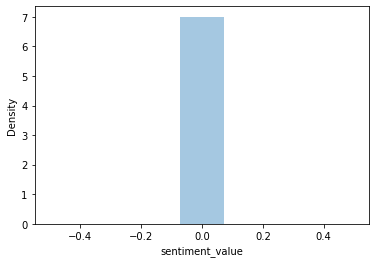

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

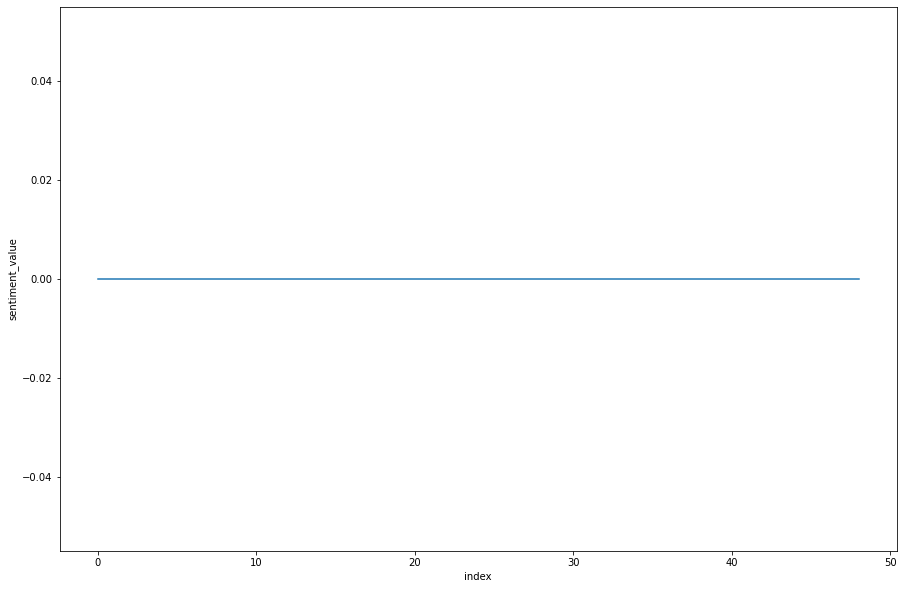

In [47]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

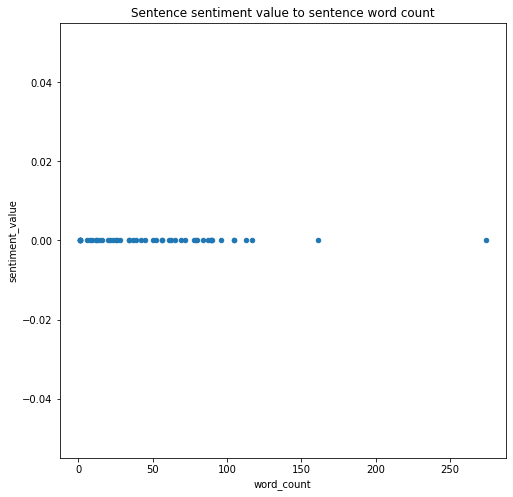

In [48]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')

In [50]:

feature_names = tf.get_feature_names()
dense = text_tf.todense()
denselist = dense.tolist()
df =pd.DataFrame(denselist, columns=feature_names)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [51]:
word_list = ' '.join(df)

In [52]:
word_list = ' '.join(df)

In [53]:
wordcloud = WordCloud(background_color='black',
                      width=1800,
                      height=1400).generate(word_list)

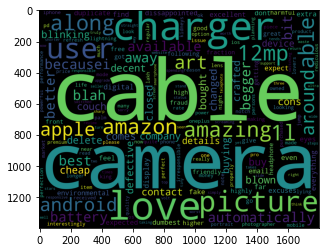

In [54]:
plt.imshow(wordcloud)